In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import math
%matplotlib inline

In [2]:
def show_image(image):
    plt.figure(dpi=100, figsize=(7,7))
    plt.axis('off')
    plt.imshow(image)
    
def show_gray(image):
    plt.figure(dpi=100, figsize=(7,7))
    plt.axis('off')
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)

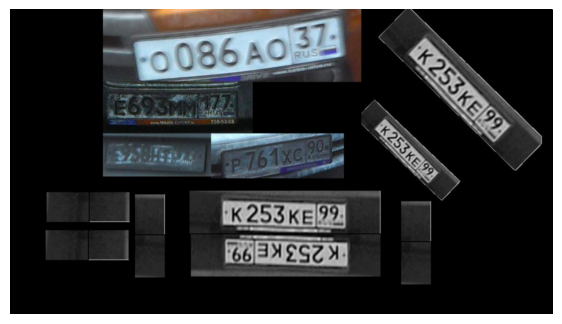

In [3]:
image = cv2.imread("numbers.png")
show_image(image)

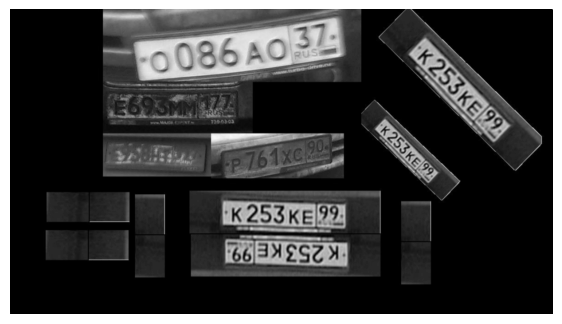

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
orig_gray = gray.copy()
show_gray(gray)

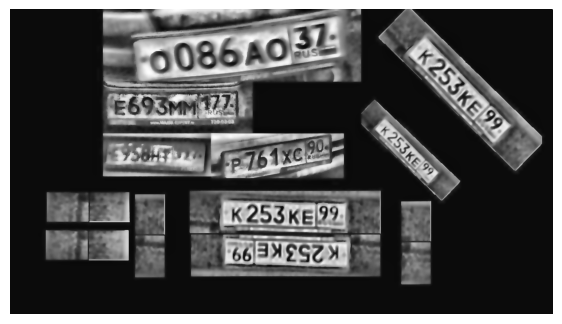

In [5]:
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(20, 20))
gray = clahe.apply(gray)
gray = cv2.bilateralFilter(gray, 9, 50, 50)
show_gray(gray)

In [6]:
_, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13)))
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Распознано номеров:  8


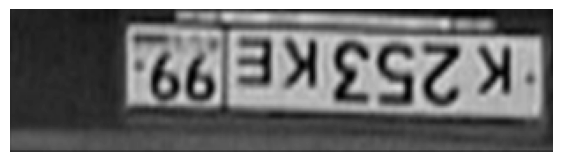

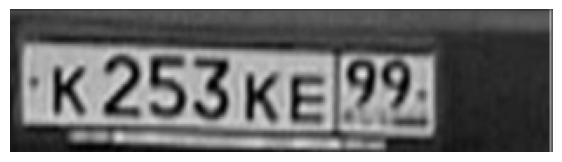

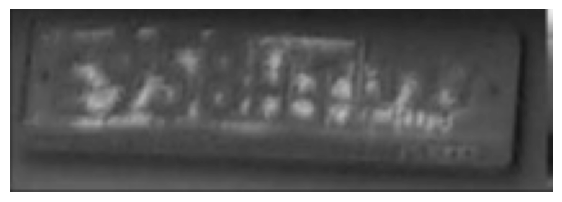

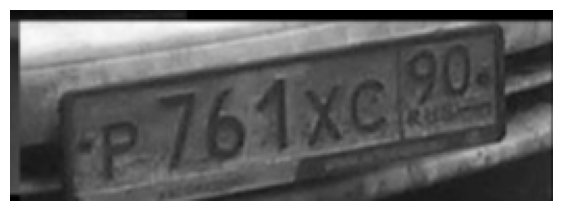

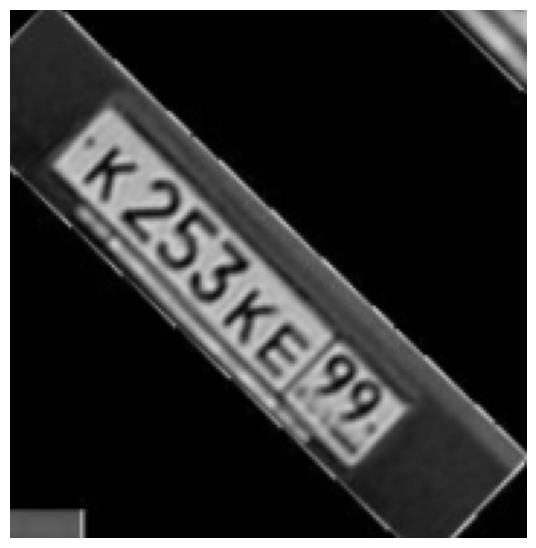

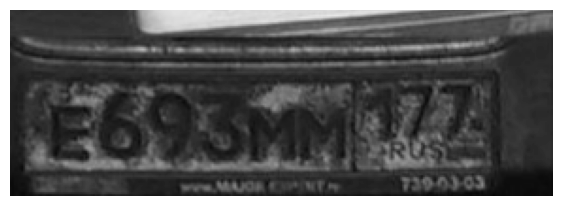

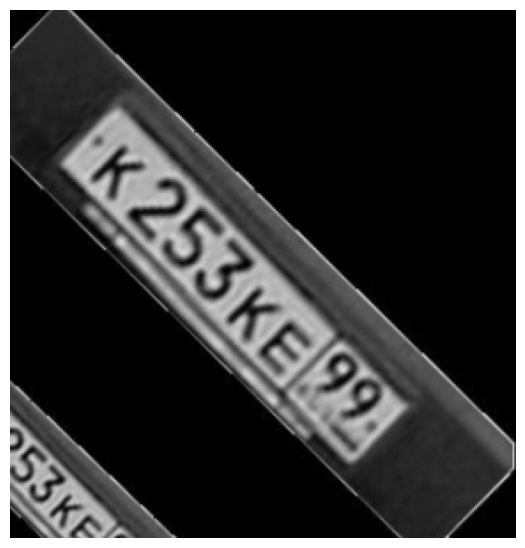

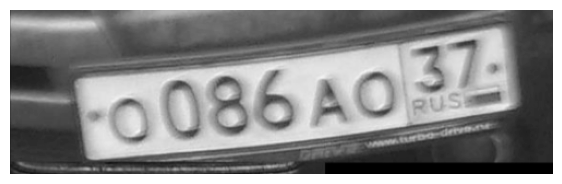

In [7]:
images = []
for c in contours:
    square = cv2.contourArea(c)
    if (square > 7500):
        x, y, w, h = cv2.boundingRect(c)
        number = orig_gray[y: y + h, x: x + w]
        images.append(number)
        show_gray(number)
print('Распознано номеров: ', len(images))